**Importing Libraries and Dataset**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [2]:
#load training and testing dataset
train_df = pd.read_excel("/content/drive/MyDrive/A.P. Moller Maersk Case Study/DS_ML Coding Challenge Dataset.xlsx", sheet_name = "Training Dataset")
test_df = pd.read_excel("/content/drive/MyDrive/A.P. Moller Maersk Case Study/DS_ML Coding Challenge Dataset.xlsx", sheet_name = "Test Dataset")


**Data Pre-processing**

In [4]:
print("Training Dataset: ")
print(train_df.head())
print(train_df.shape)
print("\nTesting Dataset: ")
print(test_df.head())
print(test_df.shape)


Training Dataset: 
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02-01        107.220  
4       Liquid        2020-11-01        197.763  
(550176, 8)

Testing Dataset: 
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1      

In [5]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [3]:
#one hot encoding the categorical columns
train_data = pd.get_dummies(train_df, columns=["ProductType", "Manufacturer", "Area Code", "Sourcing Channel", "Product Size", "Product Type"])
test_data = pd.get_dummies(test_df, columns=["ProductType", "Manufacturer", "Area Code", "Sourcing Channel", "Product Size", "Product Type"])

train_data = train_data.astype(int)
test_data = test_data.astype(int)

In [7]:
train_data.head()

,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,...,Area Code_A9,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
0,1619827200000000000,10,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,1601510400000000000,134,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
2,1606780800000000000,12,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1612137600000000000,107,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1604188800000000000,197,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [8]:
# scaler = MinMaxScaler()
# train_data["Sourcing Cost"] = scaler.fit_transform(train_data[["Sourcing Cost"]])
# test_data["Sourcing Cost"] = scaler.transform(test_data[["Sourcing Cost"]])

**EDA**

In [9]:
#unique column values
print(train_df.nunique())

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        6747
dtype: int64


In [10]:
#check for datatype of each column

column_data_types = train_df.dtypes
print("Data Types of Each Column:")
print(column_data_types)

column_types = train_data.dtypes
print("Data Types of Each Column (encoded):")
print(column_types)

Data Types of Each Column:
ProductType                  object
Manufacturer                 object
Area Code                    object
Sourcing Channel             object
Product Size                 object
Product Type                 object
Month of Sourcing    datetime64[ns]
Sourcing Cost               float64
dtype: object
Data Types of Each Column (encoded):
Month of Sourcing          int64
Sourcing Cost              int64
ProductType_NTM1           int64
ProductType_NTM2           int64
ProductType_NTM3           int64
                           ...  
Product Size_ExtraLarge    int64
Product Size_Large         int64
Product Size_Small         int64
Product Type_Liquid        int64
Product Type_Powder        int64
Length: 62, dtype: object


In [11]:
train_data.head()

,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,...,Area Code_A9,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
0,1619827200000000000,10,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,1601510400000000000,134,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
2,1606780800000000000,12,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1612137600000000000,107,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1604188800000000000,197,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [12]:
#describe the original training dataframe
train_df.describe()

,Month of Sourcing,Sourcing Cost
count,550176,550176.000000
mean,2020-12-08 10:27:28.769848576,108.816793
min,2020-07-01 00:00:00,-196.070000
25%,2020-10-01 00:00:00,57.000000
50%,2020-12-01 00:00:00,132.000000
75%,2021-03-01 00:00:00,146.147000
max,2021-05-01 00:00:00,32632.500000
std,NaN,104.390097


In [13]:
#describe the encoded training dataframe
train_data.describe()

,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,...,Area Code_A9,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
count,5.501760e+05,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000,550176.00000,550176.000000,...,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000,550176.000000
mean,1.607423e+18,108.332314,0.354292,0.430273,0.215435,0.763132,0.219375,0.017493,0.02304,0.041750,...,0.018370,0.824494,0.056538,0.109076,0.009891,0.007539,0.591749,0.400712,0.142832,0.857168
std,8.104973e+15,104.371710,0.478299,0.495115,0.411124,0.425161,0.413824,0.131098,0.15003,0.200018,...,0.134287,0.380399,0.230958,0.311735,0.098962,0.086502,0.491511,0.490043,0.349902,0.349902
min,1.593562e+18,-196.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.601510e+18,57.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.606781e+18,132.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.614557e+18,146.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.619827e+18,32632.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#value count for each column
value_counts_dict = {}
for column in train_df.columns:
    value_counts = train_df[column].value_counts()
    value_counts_dict[column] = value_counts

for column, value_counts in value_counts_dict.items():
    print(f"Value counts for {column}:")
    print(value_counts)
    print("\n")

Value counts for ProductType:
ProductType
NTM2    236726
NTM1    194923
NTM3    118527
Name: count, dtype: int64


Value counts for Manufacturer:
Manufacturer
X1    419857
X2    120695
X3      9624
Name: count, dtype: int64


Value counts for Area Code:
Area Code
A28    41925
A7     36723
A3     33247
A11    31111
A8     28772
A44    26490
A5     24252
A10    22970
A25    20422
A31    18379
A29    18105
A16    15938
A12    14547
A40    13820
A21    13374
A43    13234
A2     13145
A1     12676
A6     12399
A4     11326
A24    10725
A18    10154
A9     10107
A22     9624
A14     9424
A35     8877
A45     8188
A13     7548
A42     6470
A33     5769
A15     5496
A32     5408
A36     4843
A34     4249
A19     3839
A38     3065
A26     2360
A30     2357
A20     2126
A46     1732
A39     1702
A37     1432
A17     1139
A23      569
A41      118
Name: count, dtype: int64


Value counts for Sourcing Channel:
Sourcing Channel
DIRECT       453617
RETAIL        60011
ECOM          31106
WHOLESALE  

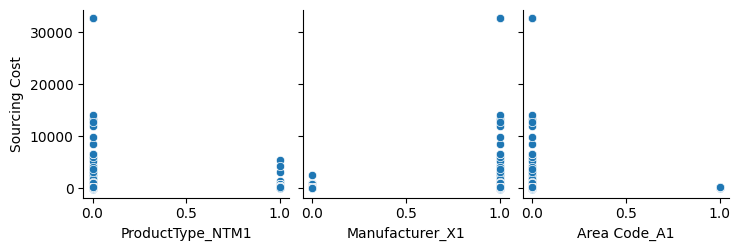

In [15]:
#pairplots
sns.pairplot(train_data, x_vars=["ProductType_NTM1", "Manufacturer_X1", "Area Code_A1"], y_vars=["Sourcing Cost"])
plt.show()

In [16]:
#unique combinations of each
unique_combinations = train_df[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']].drop_duplicates()
print("Unique combinations of columns A to F:")
print(unique_combinations)

Unique combinations of columns A to F:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
1             NTM2           X1        A9           DIRECT        Large   
2             NTM3           X2       A20           DIRECT        Large   
3             NTM3           X1       A18        WHOLESALE        Small   
4             NTM2           X1       A28           DIRECT        Large   
...            ...          ...       ...              ...          ...   
138809        NTM2           X1       A23           RETAIL        Large   
138815        NTM1           X1        A3           DIRECT        Small   
138819        NTM2           X1       A26           DIRECT        Small   
138864        NTM1           X2       A42           DIRECT        Large   
139034        NTM2           X1       A38           DIRECT        Small   

       Product Type  
0            Powder  
1            Pow

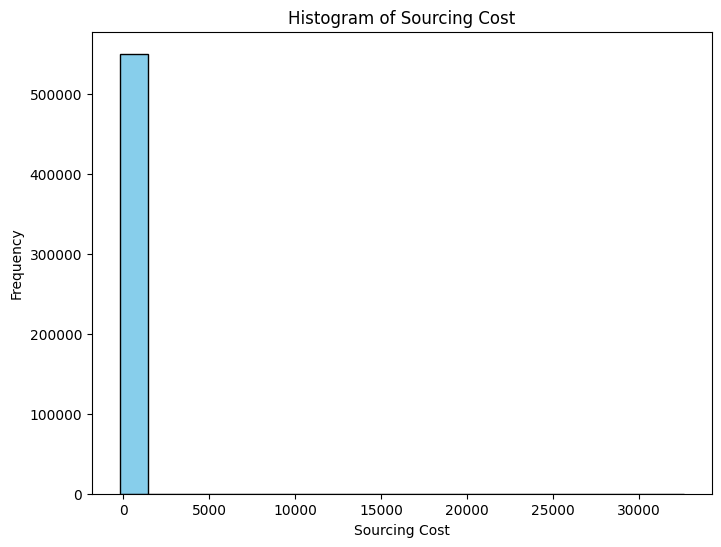

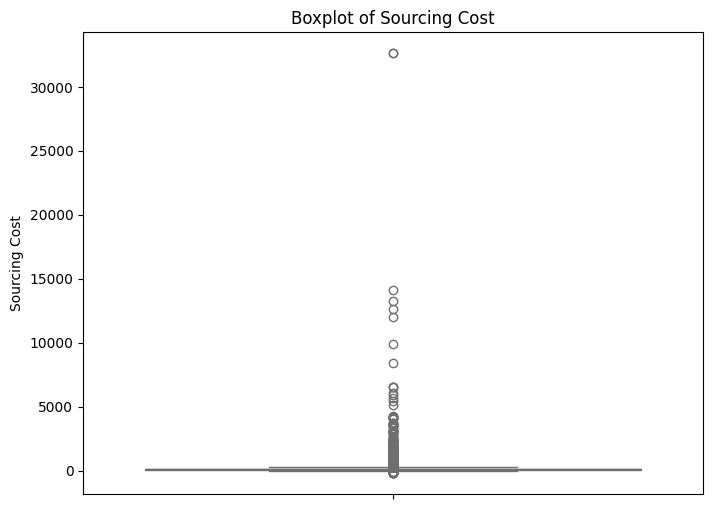

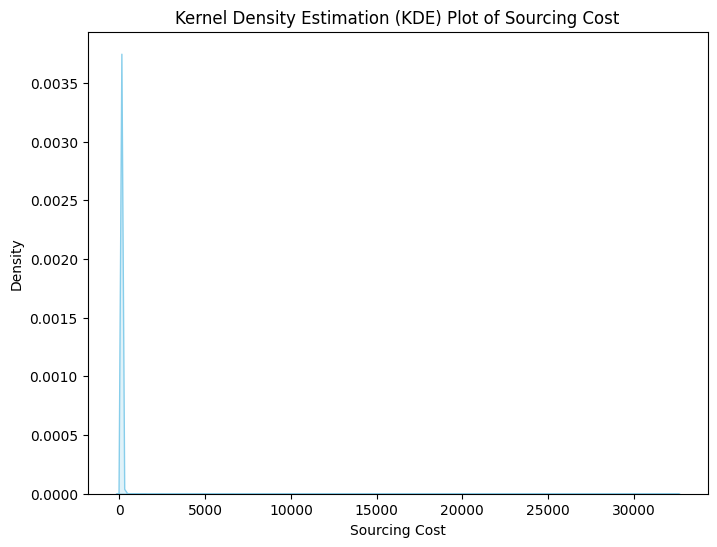

In [17]:
#histogram of sourcing cost
plt.figure(figsize=(8, 6))
plt.hist(train_data['Sourcing Cost'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Sourcing Cost
plt.figure(figsize=(8, 6))
sns.boxplot(y=train_data['Sourcing Cost'], color='skyblue')
plt.title('Boxplot of Sourcing Cost')
plt.ylabel('Sourcing Cost')
plt.show()

# KDE Plot of Sourcing Cost
plt.figure(figsize=(8, 6))
sns.kdeplot(train_data['Sourcing Cost'], color='skyblue', fill=True)
plt.title('Kernel Density Estimation (KDE) Plot of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Density')
plt.show()

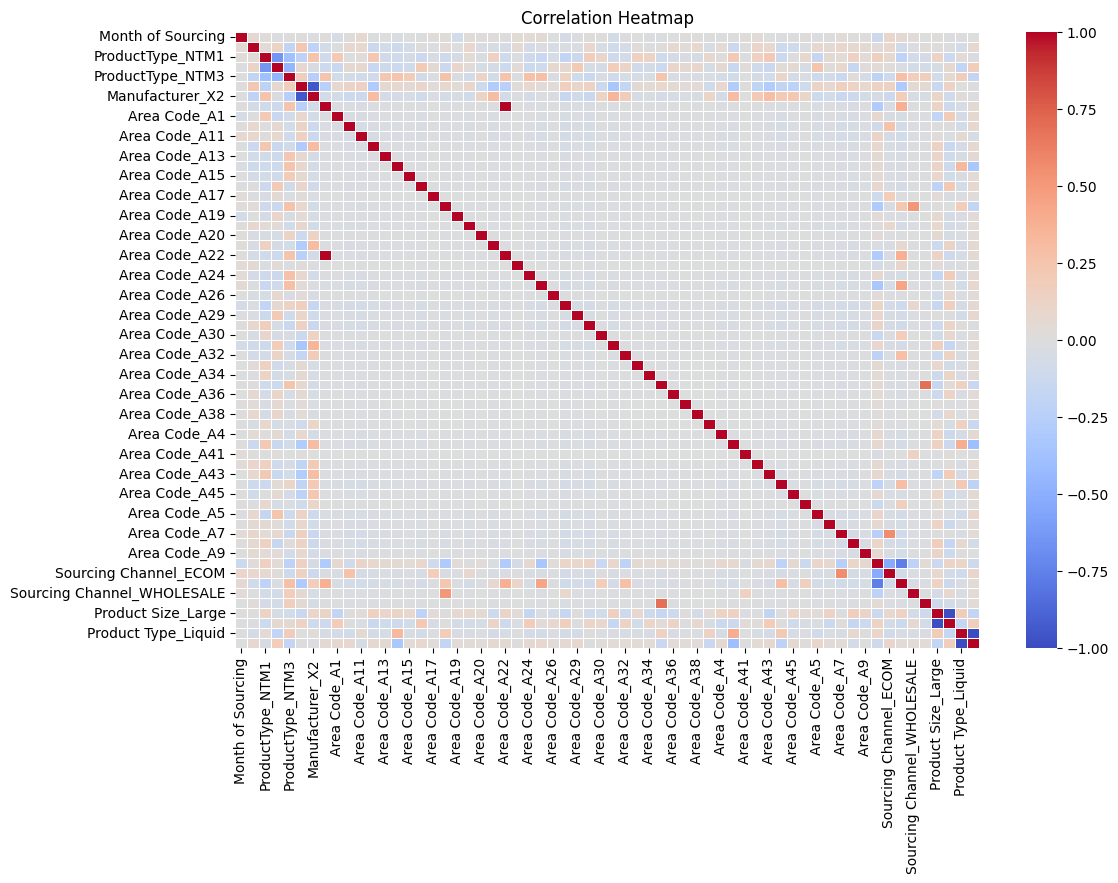

In [18]:
#Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))

# Customize the heatmap with color map and annotations
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


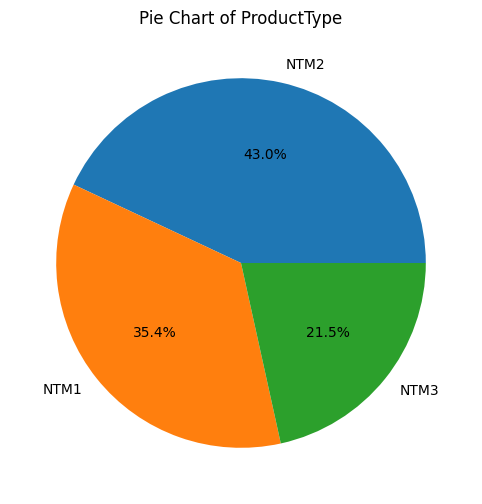

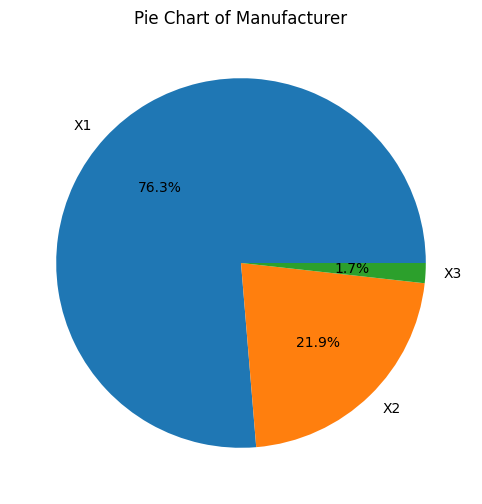

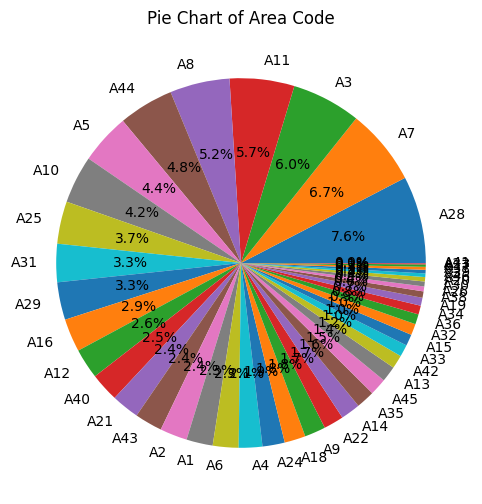

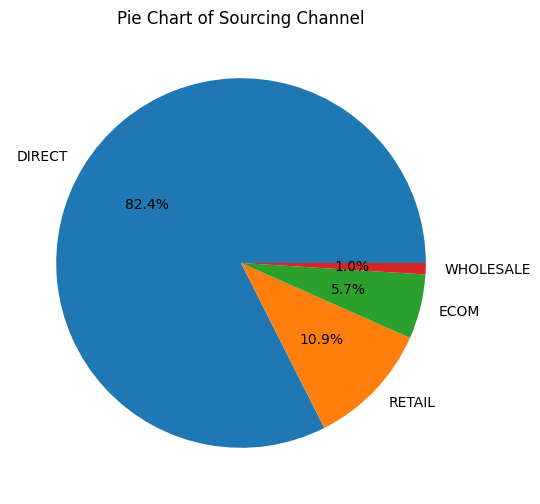

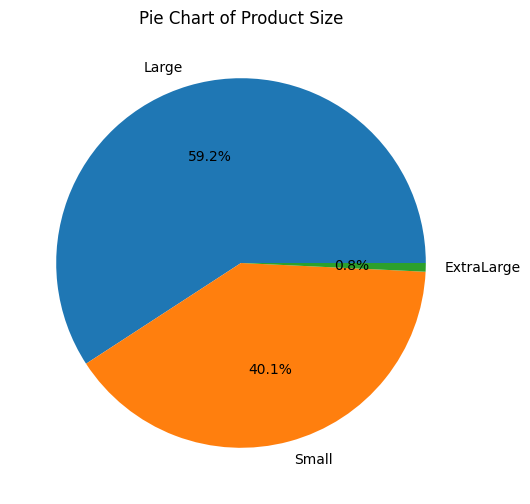

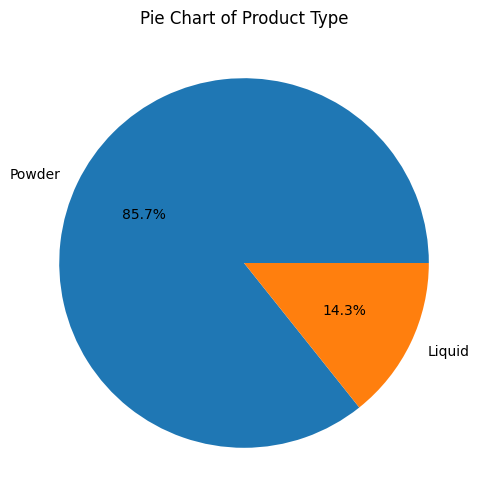

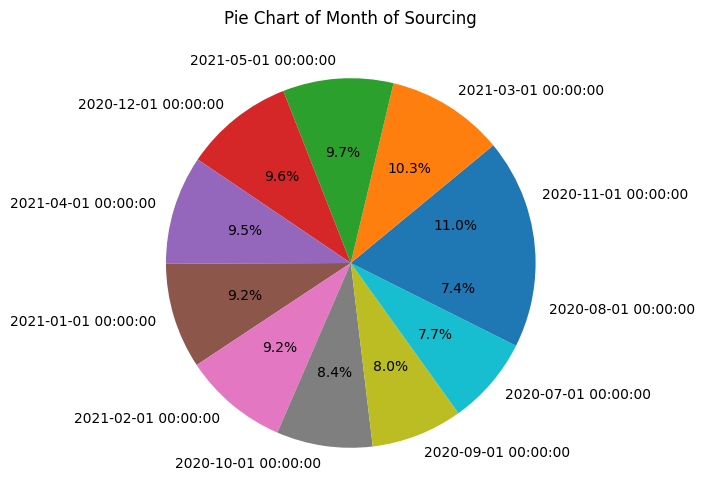

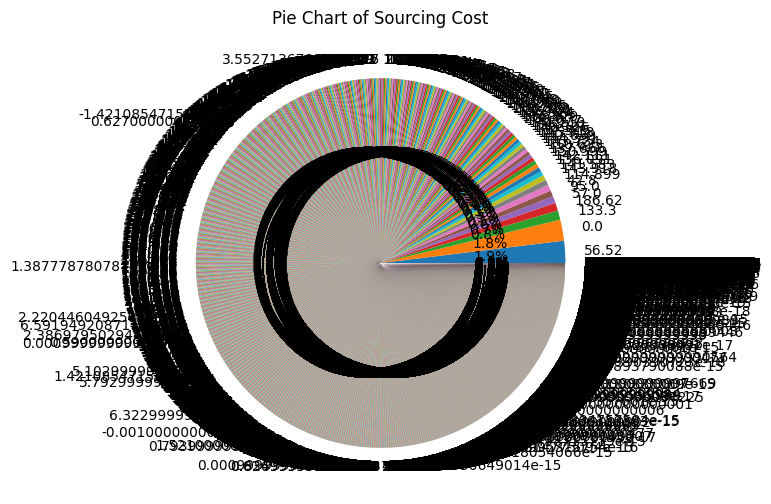

In [19]:
#pie chart
for column in train_df.columns:
  plt.figure(figsize=(8, 6))
  train_df[column].value_counts().plot.pie(autopct='%1.1f%%')
  plt.title(f'Pie Chart of {column}')
  plt.ylabel('')
  plt.show()

In [20]:
#Cross tabulation and Chi - Square test
for col1 in train_df.columns:
    for col2 in train_df.columns:
      if train_df[col2].dtype == 'object' and col1 != col2:
        # Perform cross-tabulation
        cross_tab = pd.crosstab(train_df[col1], train_df[col2])
        # Print cross-tabulation
        print(f"\nCross-tabulation between {col1} and {col2}:")
        print(cross_tab)
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        print("\nChi-square test:")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print(f"Degrees of freedom: {dof}")
        print("Expected frequencies:")
        print(expected)



Cross-tabulation between ProductType and Manufacturer:
Manufacturer      X1     X2    X3
ProductType                      
NTM1          124354  70569     0
NTM2          188726  48000     0
NTM3          106777   2126  9624

Chi-square test:
Chi-square statistic: 82662.19403067217
P-value: 0.0
Degrees of freedom: 4
Expected frequencies:
[[148752.0102858   42761.28272589   3409.70698831]
 [180653.22402649  51931.82648825   4140.94948526]
 [ 90451.76568771  26001.89078586   2073.34352644]]

Cross-tabulation between ProductType and Area Code:
Area Code       A1    A10    A11    A12   A13   A14   A15    A16   A17    A18  \
ProductType                                                                     
NTM1         12676   8078  12098  14547     0     0     0      0     0      0   
NTM2             0  13544  17520      0     0     0     0  15938  1139      0   
NTM3             0   1348   1493      0  7548  9424  5496      0     0  10154   

Area Code    ...   A42    A43    A44   A45   A

**Handle Outliers**

Usually as categorical data does not directly have outliers in the same sense as in numerical data, checking the data for null values, class inbalance and unique values

In [21]:
#check for null
print("Original Dataset")
print("Training:")
print(train_df.isnull().sum())
print("\nTesting")
print(test_df.isnull().sum())

print("\nEncoded Dataset")
print("Training")
print(train_data.isnull().sum())
print("\nTesting")
print(test_data.isnull().sum())

Original Dataset
Training:
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

Testing
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

Encoded Dataset
Training
Month of Sourcing          0
Sourcing Cost              0
ProductType_NTM1           0
ProductType_NTM2           0
ProductType_NTM3           0
                          ..
Product Size_ExtraLarge    0
Product Size_Large         0
Product Size_Small         0
Product Type_Liquid        0
Product Type_Powder        0
Length: 62, dtype: int64

Testing
Month of Sourcing          0
Sourcing Cost              0
ProductType_NTM1           0
ProductType_NTM2           0
ProductType_NTM3           0
                          ..
Product Size_Extr

In [22]:
#unique column values
print(train_df.nunique())

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        6747
dtype: int64


In [23]:
#value count for each column
value_counts_dict = {}
for column in train_df.columns:
    value_counts = train_df[column].value_counts()
    value_counts_dict[column] = value_counts

for column, value_counts in value_counts_dict.items():
    print(f"Value counts for {column}:")
    print(value_counts)
    print("\n")

Value counts for ProductType:
ProductType
NTM2    236726
NTM1    194923
NTM3    118527
Name: count, dtype: int64


Value counts for Manufacturer:
Manufacturer
X1    419857
X2    120695
X3      9624
Name: count, dtype: int64


Value counts for Area Code:
Area Code
A28    41925
A7     36723
A3     33247
A11    31111
A8     28772
A44    26490
A5     24252
A10    22970
A25    20422
A31    18379
A29    18105
A16    15938
A12    14547
A40    13820
A21    13374
A43    13234
A2     13145
A1     12676
A6     12399
A4     11326
A24    10725
A18    10154
A9     10107
A22     9624
A14     9424
A35     8877
A45     8188
A13     7548
A42     6470
A33     5769
A15     5496
A32     5408
A36     4843
A34     4249
A19     3839
A38     3065
A26     2360
A30     2357
A20     2126
A46     1732
A39     1702
A37     1432
A17     1139
A23      569
A41      118
Name: count, dtype: int64


Value counts for Sourcing Channel:
Sourcing Channel
DIRECT       453617
RETAIL        60011
ECOM          31106
WHOLESALE  

**Model Training**

In [5]:
#Linear Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

X = train_data.drop('Sourcing Cost', axis=1)
y = train_data['Sourcing Cost']

# Splitting the dataset into train and test datasets for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fitting the Linear Regression Model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train_scaled, y_train)

# Predicting y
y_pred = lin_reg.predict(X_test_scaled)

# R^2 score
print('R^2 score of the model is:', r2_score(y_test, y_pred))

# MSE
print('MSE of the model is:', mean_squared_error(y_test, y_pred))

# RMSE Of the Model
print('RMSE of the model is:', np.sqrt(mean_squared_error(y_test, y_pred)))

# MAE Of the Model
print('MAE of the model is:', mean_absolute_error(y_test, y_pred))

# Create a linear regression model using statsmodels
model = sm.OLS(y_train, X_train_scaled).fit(hasconst=False)

# Print the summary of the model which includes ANOVA table
print(model.summary())


R^2 score of the model is: 0.41938237514259513
MSE of the model is: 3264.3095854058997
RMSE of the model is: 57.134136778338565
MAE of the model is: 20.779482953960244
                            OLS Regression Results                            
Dep. Variable:          Sourcing Cost   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     1609.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        10:08:40   Log-Likelihood:            -2.3336e+06
No. Observations:              385123   AIC:                         4.667e+06
Df Residuals:                  385068   BIC:                         4.668e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Separate features (X) and target variable (y) in the training data
X_train = train_data.drop('Sourcing Cost', axis=1)
X_train = X_train.drop('Month of Sourcing', axis=1)
y_train = train_data['Sourcing Cost']

# Separate features (X) and target variable (y) in the test data
X_test = test_data.drop('Sourcing Cost', axis=1)
X_test = X_test.drop('Month of Sourcing', axis=1)

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform scaler on training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Fit the model on scaled training data
lin_reg.fit(X_train_scaled, y_train)

# Predict target variable for test data
y_pred_test = lin_reg.predict(X_test_scaled)

# R^2 score
print('R^2 score of the model is:', r2_score(y_test, y_pred))

# MSE
print('MSE of the model is:', mean_squared_error(y_test, y_pred))

# RMSE Of the Model
print('RMSE of the model is:', np.sqrt(mean_squared_error(y_test, y_pred)))

# MAE Of the Model
print('MAE of the model is:', mean_absolute_error(y_test, y_pred))

# Add predicted values as a new column in the test dataframe
test_data_new = test_data.copy()
test_data_new['Predicted Sourcing Cost'] = y_pred_test


R^2 score of the model is: 0.41938237514259513
MSE of the model is: 3264.3095854058997
RMSE of the model is: 57.134136778338565
MAE of the model is: 20.779482953960244


In [7]:
test_data_new.head()

,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,...,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Predicted Sourcing Cost
0,1624233600000000000,103,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,99.000
1,1624233600000000000,155,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,150.875
2,1624233600000000000,143,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,151.750
3,1624233600000000000,139,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,146.250
4,1624233600000000000,169,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,162.125


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Separate features (X) and target variable (y) in the training data
X_train = train_data.drop('Sourcing Cost', axis=1)
X_train = X_train.drop('Month of Sourcing', axis=1)
y_train = train_data['Sourcing Cost']

# Separate features (X) and target variable (y) in the test data
X_test = test_data.drop('Sourcing Cost', axis=1)
X_test = X_test.drop('Month of Sourcing', axis=1)
y_test = test_data['Sourcing Cost']

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform scaler on training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter dictionaries
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_params = {'alpha': [0.001, 0.01, 0.1]}

# Grid Search for Ridge Regression
ridge_reg = Ridge()
ridge_grid_search = GridSearchCV(ridge_reg, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train_scaled, y_train)

# Grid Search for Lasso Regression
lasso_reg = Lasso()
lasso_grid_search = GridSearchCV(lasso_reg, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train_scaled, y_train)

# Find best models and parameters
best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_params = ridge_grid_search.best_params_

best_lasso_model = lasso_grid_search.best_estimator_
best_lasso_params = lasso_grid_search.best_params_

# Ridge prediction
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# Lasso prediction
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

# Evaluation for Ridge model
print("Ridge Model:")
print('R^2 score:', r2_score(y_test, y_pred_ridge))
print('MSE:', mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))

# Evaluation for Lasso model
print("\nLasso Model:")
print('R^2 score:', r2_score(y_test, y_pred_lasso))
print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))

# Add predicted values for both models as new columns
test_data_new = test_data.copy()
test_data_new['Predicted Sourcing Cost (Ridge)'] = y_pred_ridge
test_data_new['Predicted Sourcing Cost (Lasso)'] = y_pred_lasso



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.757e+06, tolerance: 5.450e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.222e+06, tolerance: 4.359e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+07, tolerance: 5.349e

Ridge Model:
R^2 score: 0.37177161394507396
MSE: 1703.8469996205924
RMSE: 41.277681616347984
MAE: 25.467339048261334

Lasso Model:
R^2 score: 0.3921192939033036
MSE: 1648.6611242038798
RMSE: 40.60370825680679
MAE: 25.43384316614308


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e+06, tolerance: 5.993e+05
  model = cd_fast.enet_coordinate_descent(


In [9]:
test_data_new.head()

,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,...,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Predicted Sourcing Cost (Ridge),Predicted Sourcing Cost (Lasso)
0,1624233600000000000,103,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,102.361290,102.773963
1,1624233600000000000,155,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,150.542454,150.031446
2,1624233600000000000,143,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,151.370832,150.842118
3,1624233600000000000,139,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,145.787409,145.341731
4,1624233600000000000,169,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,161.605754,161.162829


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Separate features (X) and target variable (y) in the training data
X_train = train_data.drop('Sourcing Cost', axis=1)
X_train = X_train.drop('Month of Sourcing', axis=1)  # Assuming this feature is not useful
y_train = train_data['Sourcing Cost']

# Separate features (X) and target variable (y) in the test data
X_test = test_data.drop('Sourcing Cost', axis=1)
X_test = X_test.drop('Month of Sourcing', axis=1)  # Assuming this feature is not useful
y_test = test_data['Sourcing Cost']

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform scaler on training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter dictionaries
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Wider range of alpha values for Ridge
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}  # Wider range of alpha values for Lasso

# Grid Search for Ridge Regression
ridge_reg = Ridge()
ridge_grid_search = GridSearchCV(ridge_reg, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train_scaled, y_train)

# Grid Search for Lasso Regression
lasso_reg = Lasso(max_iter=1000)  # Increased iterations to address potential convergence issues
lasso_grid_search = GridSearchCV(lasso_reg, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train_scaled, y_train)

# Find best models and parameters
best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_params = ridge_grid_search.best_params_

best_lasso_model = lasso_grid_search.best_estimator_
best_lasso_params = lasso_grid_search.best_params_

# Ridge prediction
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# Lasso prediction
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

# Evaluation for Ridge model
print("Ridge Model:")
print('R^2 score:', r2_score(y_test, y_pred_ridge))
print('MSE:', mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))

# Evaluation for Lasso model
print("\nLasso Model:")
print('R^2 score:', r2_score(y_test, y_pred_lasso))
print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))

# Add predicted values for both models as new columns
test_data_new = test_data.copy()
test_data_new['Predicted Sourcing Cost (Ridge)'] = y_pred_ridge
test_data_new['Predicted Sourcing Cost (Lasso)'] = y_pred_lasso


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+08, tolerance: 5.450e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+08, tolerance: 4.359e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.665e+07, tolerance: 5.349e

Ridge Model:
R^2 score: 0.39372336254898777
MSE: 1644.3106561101067
RMSE: 40.55010056843394
MAE: 25.291700819019763

Lasso Model:
R^2 score: 0.3921192939033036
MSE: 1648.6611242038798
RMSE: 40.60370825680679
MAE: 25.43384316614308


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e+06, tolerance: 5.993e+05
  model = cd_fast.enet_coordinate_descent(


In [10]:
test_data_new.head()

,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,...,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Predicted Sourcing Cost (Ridge),Predicted Sourcing Cost (Lasso)
0,1624233600000000000,103,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,102.532850,102.773963
1,1624233600000000000,155,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,150.716370,150.031446
2,1624233600000000000,143,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,151.070769,150.842118
3,1624233600000000000,139,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,145.506466,145.341731
4,1624233600000000000,169,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,161.810002,161.162829


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Separate features (X) and target variable (y) in the training data
X_train = train_data.drop('Sourcing Cost', axis=1)
X_train = X_train.drop('Month of Sourcing', axis=1)
y_train = train_data['Sourcing Cost']

# Separate features (X) and target variable (y) in the test data
X_test = test_data.drop('Sourcing Cost', axis=1)
X_test = X_test.drop('Month of Sourcing', axis=1)
y_test = test_data['Sourcing Cost']

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform scaler on training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Reduce param_grid search space (fewer values to try)
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of estimators
    'max_depth': [None, 15],     # Reduced max_depth options
    'min_samples_split': [2, 5],  # Reduced min_samples_split options
    'min_samples_leaf': [1, 2]   # Reduced min_samples_leaf options
}

# Consider using early_stopping to stop poorly performing hyperparameter searches early
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                            param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
                            verbose=2)  # Verbose output shows progress during GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)

# Fit the model on the training data
best_rf_regressor.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred_rf = best_rf_regressor.predict(X_test_scaled)

# Evaluate the model
print("Evaluation Metrics for Random Forest Regressor:")
print("R^2 score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

test_data_new = test_data.copy()
test_data_new['Predicted Sourcing Cost'] = y_pred_rf


Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
test_data_new.head()

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Separate features (X) and target variable (y) in the training data
X_train = train_data.drop('Sourcing Cost', axis=1)
X_train = X_train.drop('Month of Sourcing', axis=1)
y_train = train_data['Sourcing Cost']

# Separate features (X) and target variable (y) in the test data
X_test = test_data.drop('Sourcing Cost', axis=1)
X_test = X_test.drop('Month of Sourcing', axis=1)
y_test = test_data['Sourcing Cost']

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform scaler on training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define param_grid for Decision Tree Regressor
param_grid = {
    'max_depth': [3, 5, 8],  # Range of maximum tree depth
    'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 4]   # Minimum samples required to be at a leaf node
}

# Perform GridSearchCV with DecisionTreeRegressor
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                            param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
                            verbose=2)  # Verbose output shows progress during GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_params)

# Initialize Decision Tree Regressor with best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params, random_state=42)

# Fit the model on the training data
best_dt_regressor.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred_dt = best_dt_regressor.predict(X_test_scaled)

# Evaluate the model
print("Evaluation Metrics for Decision Tree Regressor:")
print("R^2 score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))

test_data_new = test_data.copy()
test_data_new['Predicted Sourcing Cost (DT)'] = y_pred_dt


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for Decision Tree: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Evaluation Metrics for Decision Tree Regressor:
R^2 score: 0.5911973109218098
MSE: 1108.7325098388758
RMSE: 33.29763519889777
MAE: 20.816939165313673


In [17]:
test_data_new.head(10)

,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,...,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Predicted Sourcing Cost (DT)
0,1624233600000000000,103,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,102.339934
1,1624233600000000000,155,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,145.536371
2,1624233600000000000,143,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,145.536371
3,1624233600000000000,139,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,145.536371
4,1624233600000000000,169,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,145.536371
5,1624233600000000000,169,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,145.685559
6,1624233600000000000,47,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,38.089398
7,1624233600000000000,56,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,125.721268
8,1624233600000000000,125,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,145.536371
9,1624233600000000000,157,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,145.536371


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import randint
import numpy as np

# Define param_dist for Gradient Boosting Regressor
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of boosting stages
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Learning rate shrinks the contribution of each tree
    'max_depth': randint(3, 20),  # Maximum depth of the individual regression estimators
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),   # Minimum number of samples required to be at a leaf node
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]  # Subsample ratio of the training instance
}

# Perform RandomizedSearchCV with GradientBoostingRegressor
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                                      param_distributions=param_dist, cv=5, scoring='neg_mean_squared_error', n_iter=100, n_jobs=-1,
                                      verbose=2)  # Verbose output shows progress during RandomizedSearchCV
random_search_gb.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_gb = random_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

# Initialize Gradient Boosting Regressor with best hyperparameters
best_gb_regressor = GradientBoostingRegressor(**best_params_gb, random_state=42)

# Fit the model on the training data
best_gb_regressor.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred_gb = best_gb_regressor.predict(X_test_scaled)

# Evaluate the model
print("Evaluation Metrics for Gradient Boosting Regressor:")
print("R^2 score:", r2_score(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))

test_data_new = test_data.copy()
test_data_new['Predicted Sourcing Cost (GB)'] = y_pred_gb

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
test_data_new.head(10)

In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Initialize empty list to store results
results = []

# Iterate over each unique ProductType
for prod_type in train_data.filter(like='ProductType').columns:
    # Filter train and test data for the current ProductType
    train_data_subset = train_data[train_data[prod_type] == 1]
    test_data_subset = test_data[test_data[prod_type] == 1]

    # Drop columns related to other ProductTypes for training data
    train_data_subset = train_data_subset.drop(train_data.filter(like='ProductType').columns.difference([prod_type]), axis=1)
    # Drop columns related to other ProductTypes for test data
    test_data_subset = test_data_subset.drop(test_data.filter(like='ProductType').columns.difference([prod_type]), axis=1)

    # Separate features (X) and target variable (y) in the training data
    X_train = train_data_subset.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
    y_train = train_data_subset['Sourcing Cost']

    # Separate features (X) and target variable (y) in the test data
    X_test = test_data_subset.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
    y_test = test_data_subset['Sourcing Cost']

    # Fit and transform scaler on training features
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform test features using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Fit the model on scaled training data
    lin_reg.fit(X_train_scaled, y_train)

    # Predict target variable for test data
    y_pred_test = lin_reg.predict(X_test_scaled)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)

    # Print evaluation metrics
    print(X_train.head()) #ensure columns are dropped
    print(f"For ProductType {prod_type}:")
    print('R^2 score of the model is:', r2)
    print('MSE of the model is:', mse)
    print('RMSE of the model is:', rmse)
    print('MAE of the model is:', mae)
    print("--------------------------------------")

    # Append results to list
    results.append({'ProductType': prod_type,
                    'R^2 Score': r2,
                    'MSE': mse,
                    'RMSE': rmse,
                    'MAE': mae})

# Create DataFrame from results list
predictions_df = pd.DataFrame(results)


    ProductType_NTM1  Manufacturer_X1  Manufacturer_X2  Manufacturer_X3  \
5                  1                1                0                0   
11                 1                1                0                0   
16                 1                1                0                0   
18                 1                1                0                0   
22                 1                1                0                0   

    Area Code_A1  Area Code_A10  Area Code_A11  Area Code_A12  Area Code_A13  \
5              0              1              0              0              0   
11             0              0              0              0              0   
16             0              0              0              0              0   
18             0              0              0              0              0   
22             0              1              0              0              0   

    Area Code_A14  ...  Area Code_A9  Sourcing Channel_DIRECT  \
5  

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Initialize empty list to store results
results = []

# Iterate over each unique Manufacturer type
for manu_type in train_data.filter(like='Manufacturer').columns:
    # Filter train and test data for the current Manufacturer type
    train_data_subset = train_data[train_data[manu_type] == 1]
    test_data_subset = test_data[test_data[manu_type] == 1]

    # Drop columns related to other manufacturers for training data
    train_data_subset = train_data_subset.drop(train_data.filter(like='Manufacturer').columns.difference([manu_type]), axis=1)
    # Drop columns related to other manufacturers for test data
    test_data_subset = test_data_subset.drop(test_data.filter(like='Manufacturer').columns.difference([manu_type]), axis=1)

    # Separate features (X) and target variable (y) in the training data
    X_train = train_data_subset.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
    y_train = train_data_subset['Sourcing Cost']

    # Separate features (X) and target variable (y) in the test data
    X_test = test_data_subset.drop(['Sourcing Cost', 'Month of Sourcing'], axis=1)
    y_test = test_data_subset['Sourcing Cost']

    # Fit and transform scaler on training features
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform test features using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Fit the model on scaled training data
    lin_reg.fit(X_train_scaled, y_train)

    # Predict target variable for test data
    y_pred_test = lin_reg.predict(X_test_scaled)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)

    # Print evaluation metrics
    print(X_train.head()) #ensure columns are dropped
    print(f"For Manufacturer {manu_type}:")
    print('R^2 score of the model is:', r2)
    print('MSE of the model is:', mse)
    print('RMSE of the model is:', rmse)
    print('MAE of the model is:', mae)
    print("--------------------------------------")

    # Append results to list
    results.append({'Manufacturer': manu_type,
                    'R^2 Score': r2,
                    'MSE': mse,
                    'RMSE': rmse,
                    'MAE': mae})

# Create DataFrame from results list
predictions_df = pd.DataFrame(results)


   ProductType_NTM1  ProductType_NTM2  ProductType_NTM3  Manufacturer_X1  \
0                 0                 0                 1                1   
1                 0                 1                 0                1   
3                 0                 0                 1                1   
4                 0                 1                 0                1   
5                 1                 0                 0                1   

   Area Code_A1  Area Code_A10  Area Code_A11  Area Code_A12  Area Code_A13  \
0             0              0              0              0              0   
1             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   
5             0              1              0              0              0   

   Area Code_A14  ...  Area Code_A9  Sourcing Channel_DIRECT  \
0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**Conclusion**


After intial exploratory data analysis the following approaches were tried:
1. Linear Regression  
2. Linear Regression with Lasso and Ridge Regularization with Hyperparameter tuning
3. Decision Tree with hyperparameter tuning
4. Random Forest
5. Gradient Boosting
6. Linear Regression with Segmented Dataset based on ProductType and Manufacturer

While executing the Random Forest and Gradient Boosting algorithms took More than expected time even after trying for different hyperparameters and hence were stopped mid-execution.


The results obtained were as follows:
1. Linear Regression
  * R^2 score of the model is: 0.41938237514259513
  * MSE of the model is: 3264.3095854058997
  * RMSE of the model is: 57.134136778338565
  * MAE of the model is: 20.779482953960244

2. Ridge and Lasso Regression
* Ridge Model:
  * R^2 score: 0.37177161394507396
  * MSE: 1703.8469996205924
  * RMSE: 41.277681616347984
  * MAE: 25.467339048261334

* Lasso Model:
  * R^2 score: 0.3921192939033036
  * MSE: 1648.6611242038798
  * RMSE: 40.60370825680679
  * MAE: 25.43384316614308

3. Ridge and Lasso Regression with tuned parameters
* Ridge Model:
  * R^2 score: 0.39372336254898777
  * MSE: 1644.3106561101067
  * RMSE: 40.55010056843394
  * MAE: 25.291700819019763

* Lasso Model:
  * R^2 score: 0.3921192939033036
  * MSE: 1648.6611242038798
  * RMSE: 40.60370825680679
  * MAE: 25.43384316614308

4. Decision Tree
* Fitting 5 folds for each of 12 candidates, totalling 60 fits
* Best Hyperparameters for Decision Tree: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
* Evaluation Metrics for Decision Tree Regressor:
  * R^2 score: 0.5911973109218098
  * MSE: 1108.7325098388758
  * RMSE: 33.29763519889777
  * MAE: 20.816939165313673

5. Regression Models with unique ProductType
* For ProductType ProductType_NTM1:
  * R^2 score of the model is: 0.9084776797706446
  * MSE of the model is: 290.2270647321429
  * RMSE of the model is: 17.03605191152407
  * MAE of the model is: 10.123214285714285

* For ProductType ProductType_NTM2:
  * R^2 score of the model is: 0.0024781288466853013
  * MSE of the model is: 2701.248511904762
  * RMSE of the model is: 51.97353664996026
  * MAE of the model is: 33.232142857142854

* For ProductType ProductType_NTM3:
  * R^2 score of the model is: -0.02118432415565219
  * MSE of the model is: 1244.0684107730262
  * RMSE of the model is: 35.271353968525595
  * MAE of the model is: 25.620065789473685

6. Regression Models with Unique Manufacturer
* For Manufacturer Manufacturer_X1:
  * R^2 score of the model is: -0.07420828189842488
  * MSE of the model is: 1965.9358038651317
  * RMSE of the model is: 44.33887463462657
  * MAE of the model is: 27.80921052631579

* For Manufacturer Manufacturer_X2:
  * R^2 score of the model is: 0.9142468583602743
  * MSE of the model is: 339.3149671052632
  * RMSE of the model is: 18.420503986190585
  * MAE of the model is: 12.30921052631579

* For Manufacturer Manufacturer_X3:
  * R^2 score of the model is: nan
  * MSE of the model is: 88.97719205769516
  * RMSE of the model is: 9.432772236076474
  * MAE of the model is: 9.432772236076474



The results demonstrate that Regression models based on segmented data (as per unique values of ProductType and Manufacturer) give good results only for specific values of both ProductType and Manufacturer, respectively, and hence may not be the best suitable model for prediction. Based on the results of the segmented regression, it is possible to break the data into smaller segments based on more than one dimension to improve forecast accuracy.

As per the current execution, the Decision Tree seems to be the most promising approach by giving the best evaluation metrics values for various models executed till now. It also provides the most near predictions for the Target (Sourcing Cost) in the Test Dataset compared with other executed models.

However the future approach may involve trying out other algorithms such as Random Forest, Gradient Boosting or Support Vector Regressor with optimised code and tuned hyperparameters. Also, model ensembling can be tried to check if a better performing stacked model can be obtained.

